## Introduction

## Case Study Background

Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. This report seeks to understand the current usage of smart personal wearables using advanced analytical tools. The analytics team then aims to present findings and narrow-down proposals relevant to Bellabeat, which will allow the stakeholders to make informed and growth-oriented decisions.

## Business Problem

Bellabeat has been able to create a strong bond with its user base. So much so that despite strong competition from far popular smart-wearable manufacturers such as Fitbit, Apple and others, Bellabeat has been able to not only maintain but grow its user base.

To understand its market position, Bellabeat aims to undergo a two-prong study: Understand usage of Bellabeat devices & Understand usage of non-Bellabeat devices. The study presented in this report will aim at understanding usage of non-Bellabeat smart devices.

Primary questions to ask in this study are:

What are some trends in smart device usage?
How could these trends apply to Bellabeat customers?
How could these trends help influence Bellabeat marketing strategy?

## The Stakeholders 

The Stakeholders for this study are:

* Urška Sršen: Bellabeat’s cofounder and Chief Creative Office
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## The Data - Preparing and Processing for Analysis 

The primary source of data used for this analysis is the FitBit Fitness Tracker Data: This Kaggle data set contains personal fitness tracker data from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

After downloading the data, it has been kept on the local drive for easy access. (Currently, a shared drive isn’t available. Once a shared drive is available, the data will be stored there with access to the relevant team members.)

Furthermore, datasets have been divided between daily, hourly and minute-level observations.

### Libraries

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns

### Data Files

In [4]:
import pandas as pd

daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_calories = pd.read_csv("dailyCalories_merged.csv")
daily_intensities = pd.read_csv("dailyIntensities_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
sleep_day = pd.read_csv("sleepDay_merged.csv")
weight_log = pd.read_csv("weightLogInfo_merged.csv")

### Displaying Data 

In [51]:
daily_activity.head()
display(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [23]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [14]:
daily_intensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [13]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [52]:
sleep_day = sleep_day.drop_duplicates()
display(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [60]:
weight_log.head()
display(weight_log)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


### Merging and Performing Operations on Datasets 

In [94]:
new_daily_activity = pd.DataFrame()
df = daily_activity.groupby(['Id'], as_index=False)["Calories"].mean()
df2 = daily_activity.groupby(['Id'], as_index=False)["ActivityDate"].count()
df3 = daily_activity.groupby(['Id'], as_index=False)["TotalSteps"].mean()
df4 = daily_activity.groupby(['Id'], as_index=False)["TotalDistance"].mean()
df5 = daily_activity.groupby(['Id'], as_index=False)["LightActiveDistance"].mean()
df6 = daily_activity.groupby(['Id'], as_index=False)["ModeratelyActiveDistance"].mean()
df7 = daily_activity.groupby(['Id'], as_index=False)["VeryActiveDistance"].mean()
new_daily_activity["Id"] = df["Id"]
new_daily_activity["Number of Days"] = df2["ActivityDate"]
new_daily_activity["Mean Calories"] = df["Calories"]
new_daily_activity["Mean Steps"] = df3["TotalSteps"]
new_daily_activity["Mean Distance"] = df4["TotalDistance"]
new_daily_activity["Mean Light Intensity"] = df5["LightActiveDistance"]
new_daily_activity["Mean Moderate Intensity"] = df6["ModeratelyActiveDistance"]
new_daily_activity["Mean High Intensity"] = df7["VeryActiveDistance"]
display(new_daily_activity)

,Id,Number of Days,Mean Calories,Mean Steps,Mean Distance,Mean Light Intensity,Mean Moderate Intensity,Mean High Intensity
0,1503960366,31,1816.419355,12116.741935,7.809677,4.152903,0.794194,2.858387
1,1624580081,31,1483.354839,5743.903226,3.914839,2.606774,0.360645,0.939355
2,1644430081,30,2811.300000,7282.966667,5.295333,3.609000,0.951000,0.730000
3,1844505072,31,1573.483871,2580.064516,1.706129,1.647419,0.049032,0.008387
4,1927972279,31,2172.806452,916.129032,0.634516,0.507097,0.031290,0.095806
5,2022484408,31,2509.967742,11370.645161,8.084193,4.942581,0.720000,2.421613
6,2026352035,31,1540.645161,5566.870968,3.454839,3.436129,0.011290,0.006129
7,2320127002,31,1724.161290,4716.870968,3.187742,2.980323,0.097742,0.106774
8,2347167796,18,2043.444444,9519.666667,6.355556,4.221667,1.075000,1.059444
9,2873212765,31,1916.967742,7555.774194,5.101613,4.143548,0.276129,0.676129


## Data Analysis and Graphing 

r = 0.4360432275591261


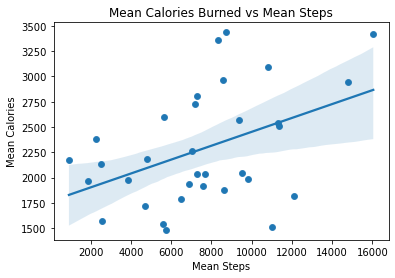

In [85]:
import seaborn as sns

#Create Scatterplot
x = new_daily_activity["Mean Steps"]
y = new_daily_activity["Mean Calories"]
plt1 = plt.scatter(new_daily_activity["Mean Steps"], new_daily_activity["Mean Calories"], s=20)
plt.title("Mean Calories Burned vs Mean Steps", fontdict={"fontsize": 12})
plt.xlabel("Mean Steps")
plt.ylabel("Mean Calories")

#Create Line of Regression with Confidence Intervals
sns.regplot(x=x, y=y)
display(plt1)

#Find Correlation Coefficient
r = np.corrcoef(x, y)
print(f"r = {r[0, 1]}")

### Analysis 

* a
    * a

r = 0.546319733853068


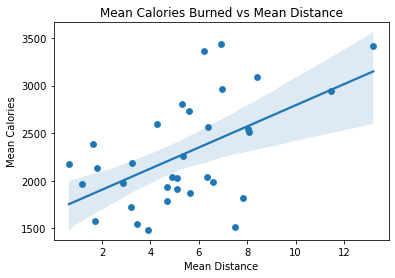

In [92]:
x = new_daily_activity["Mean Distance"]
y = new_daily_activity["Mean Calories"]
plt2 = plt.scatter(new_daily_activity["Mean Distance"], new_daily_activity["Mean Calories"], s=20)
plt.title("Mean Calories Burned vs Mean Distance", fontdict={"fontsize": 12})
plt.xlabel("Mean Distance")
plt.ylabel("Mean Calories")
sns.regplot(x=x, y=y)
display(plt2)
r = np.corrcoef(x, y)
print(f"r = {r[0, 1]}")

r = 0.35110002554182723


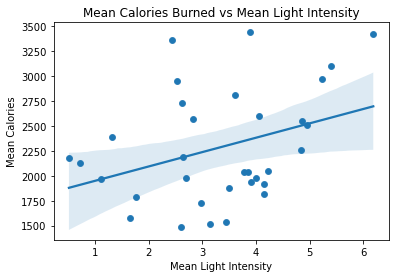

In [87]:
x = new_daily_activity["Mean Light Intensity"]
y = new_daily_activity["Mean Calories"]
plt3 = plt.scatter(new_daily_activity["Mean Light Intensity"], new_daily_activity["Mean Calories"], s=20)
plt.title("Mean Calories Burned vs Mean Light Intensity", fontdict={"fontsize": 12})
plt.xlabel("Mean Light Intensity")
plt.ylabel("Mean Calories")
sns.regplot(x=x, y=y)
display(plt3)
r = np.corrcoef(x, y)
print(f"r = {r[0, 1]}")

r = 0.06197865469641452


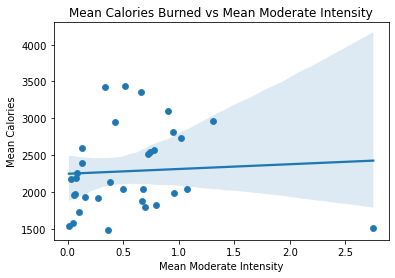

In [88]:
x = new_daily_activity["Mean Moderate Intensity"]
y = new_daily_activity["Mean Calories"]
plt4 = plt.scatter(new_daily_activity["Mean Moderate Intensity"], new_daily_activity["Mean Calories"], s=20)
plt.title("Mean Calories Burned vs Mean Moderate Intensity", fontdict={"fontsize": 12})
plt.xlabel("Mean Moderate Intensity")
plt.ylabel("Mean Calories")
sns.regplot(x=x, y=y)
display(plt4)
r = np.corrcoef(x, y)
print(f"r = {r[0, 1]}")

r = 0.51161932557632


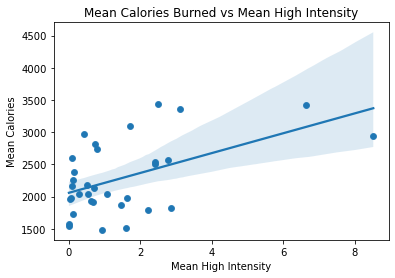

In [89]:
x = new_daily_activity["Mean High Intensity"]
y = new_daily_activity["Mean Calories"]
plt5 = plt.scatter(new_daily_activity["Mean High Intensity"], new_daily_activity["Mean Calories"], s=20)
plt.title("Mean Calories Burned vs Mean High Intensity", fontdict={"fontsize": 12})
plt.xlabel("Mean High Intensity")
plt.ylabel("Mean Calories")
sns.regplot(x=x, y=y)
display(plt5)
r = np.corrcoef(x, y)
print(f"r = {r[0, 1]}")

r = 0.9304223853922751


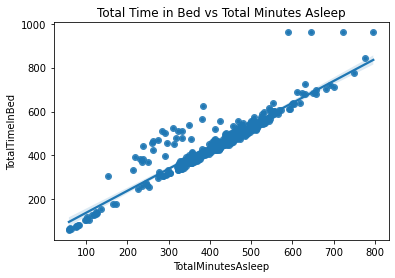

In [90]:
x = sleep_day["TotalMinutesAsleep"]
y = sleep_day["TotalTimeInBed"]
plt6 = plt.scatter(sleep_day["TotalMinutesAsleep"], sleep_day["TotalTimeInBed"], s=10)
plt.title("Total Time in Bed vs Total Minutes Asleep", fontdict={"fontsize": 12})
plt.xlabel("Total Minutes Asleep")
plt.ylabel("Total Time in Bed")
sns.regplot(x=x, y=y)
display(plt6)
r = np.corrcoef(x, y)
print(f"r = {r[0, 1]}")

r = 0.7356836959080706


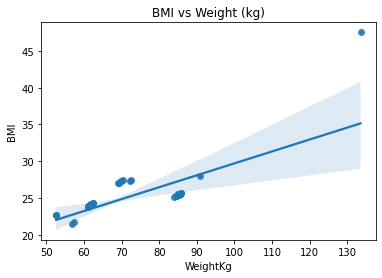

In [91]:
x = weight_log["WeightKg"]
y = weight_log["BMI"]
plt7 = plt.scatter(weight_log["WeightKg"], weight_log["BMI"], s=5)
plt.title("BMI vs Weight (kg)", fontdict={"fontsize": 12})
plt.xlabel("Weight (kg)")
plt.ylabel("BMI")
sns.regplot(x=x, y=y)
display(plt7)
r = np.corrcoef(x, y)
print(f"r = {r[0, 1]}")

In [71]:
df1 = new_daily_activity[new_daily_activity["Number of Days"] == 31]
display(df1)

,Id,Number of Days,Mean Calories,Mean Steps,Mean Distance,Mean Light Intensity,Mean Moderate Intensity,Mean High Intensity
0,1503960366,31,1816.419355,12116.741935,7.809677,4.152903,0.794194,2.858387
1,1624580081,31,1483.354839,5743.903226,3.914839,2.606774,0.360645,0.939355
3,1844505072,31,1573.483871,2580.064516,1.706129,1.647419,0.049032,0.008387
4,1927972279,31,2172.806452,916.129032,0.634516,0.507097,0.031290,0.095806
5,2022484408,31,2509.967742,11370.645161,8.084193,4.942581,0.720000,2.421613
6,2026352035,31,1540.645161,5566.870968,3.454839,3.436129,0.011290,0.006129
7,2320127002,31,1724.161290,4716.870968,3.187742,2.980323,0.097742,0.106774
9,2873212765,31,1916.967742,7555.774194,5.101613,4.143548,0.276129,0.676129
12,4020332650,31,2385.806452,2267.225806,1.626129,1.308387,0.129677,0.142258
14,4319703577,31,2037.677419,7268.838710,4.892258,3.768710,0.502258,0.278065


In [74]:
df2 = new_daily_activity[new_daily_activity["Number of Days"] < 31]
display(df2)

,Id,Number of Days,Mean Calories,Mean Steps,Mean Distance,Mean Light Intensity,Mean Moderate Intensity,Mean High Intensity
2,1644430081,30,2811.300000,7282.966667,5.295333,3.609000,0.951000,0.730000
8,2347167796,18,2043.444444,9519.666667,6.355556,4.221667,1.075000,1.059444
10,3372868164,20,1933.100000,6861.650000,4.707000,3.910000,0.153000,0.629500
11,3977333714,30,1513.666667,10984.566667,7.517000,3.134333,2.751000,1.615000
13,4057192912,4,1973.750000,3838.000000,2.862500,2.687500,0.065000,0.052500
20,5577150313,30,3359.633333,8304.433333,6.213333,2.428000,0.658000,3.113667
21,6117666160,28,2261.142857,7046.714286,5.342143,4.843214,0.083929,0.128214
22,6290855005,29,2599.620690,5649.551724,4.272414,4.048621,0.128276,0.085517
23,6775888955,26,2131.769231,2519.692308,1.813462,0.711538,0.384231,0.709231
25,7007744171,26,2544.000000,11323.423077,8.015385,4.861538,0.738462,2.415000


ValueError: shape mismatch: objects cannot be broadcast to a single shape

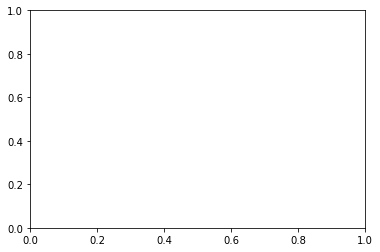

In [93]:
plt8 = plt.bar(df1["Mean Calories"], df2["Mean Calories"], color="blue", label="Mean Calories")
plt.ylabel("Average Calories")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.show()